In [3]:
import pandas as pd
# import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# tf.__version__

In [4]:
import wandb
# from wandb.tensorflow import WandbHook
# wandb.init(project="kagglehousetraining")

from wandb.keras import WandbCallback
wandb.init(project="kagglehousetraining")


W&B Run: https://app.wandb.ai/durranschristopher/kagglehousetraining/runs/xvr1sijt

In [5]:
def plot_acc(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [6]:
train_df = pd.read_excel("kaggle-house.xlsx",sheet_name="train")

X = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state=0)

In [6]:
#X_test

# Parameters

#### optimizer = ['Adadelta', 'Adagrad', 'Adam', 'Ftrl', 'Nadam', 'RMSprop', 'SGD']

#### activation = ['linear', 'sigmoid', 'tanh', 'relu', 'selu', 'elu']

In [7]:

model = keras.models.Sequential([
    keras.layers.Dense(units=10,input_shape=[304]), #Do not change input shape
    keras.layers.Dropout(0.1),#Add dropouts between layers
    keras.layers.Dense(units=5,activation='sigmoid',kernel_regularizer=keras.regularizers.l1(l=0.1)), #add l1/l2 to layers
    keras.layers.Dense(units=5,activation='tanh',kernel_regularizer=keras.regularizers.l2(l=0.1)),
    keras.layers.Dense(units=5,activation='relu'), #Kernel regularizers are optional
    keras.layers.Dense(units=1) #Do not change final layer
])

model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                3050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 3,171
Trainable params: 3,171
Non-trainable params: 0
_________________________________________________________________


In [8]:
import os

history = model.fit(X_train, y_train, batch_size=10, epochs=10, validation_data=(X_val,y_val))

model.save(os.path.join(wandb.run.dir, "model.h5"))

Train on 1051 samples, validate on 263 samples
Epoch 1/10
1051/1051 [==============================] - 1s 1ms/step - loss: 38902757120.7307 - val_loss: 39484573859.5285
Epoch 2/10
1051/1051 [==============================] - 0s 104us/step - loss: 38902045001.3168 - val_loss: 39483764284.3498
Epoch 3/10
1051/1051 [==============================] - 0s 100us/step - loss: 38901170696.2816 - val_loss: 39482839320.3346
Epoch 4/10
1051/1051 [==============================] - 0s 366us/step - loss: 38900203295.9087 - val_loss: 39481844350.5399
Epoch 5/10
1051/1051 [==============================] - 0s 402us/step - loss: 38899179800.6013 - val_loss: 39480806271.5133
Epoch 6/10
1051/1051 [==============================] - 0s 300us/step - loss: 38898106664.1903 - val_loss: 39479718464.2433
Epoch 7/10
1051/1051 [==============================] - 0s 111us/step - loss: 38896976289.0048 - val_loss: 39478545248.3650
Epoch 8/10
1051/1051 [==============================] - 0s 157us/step - loss: 388957621

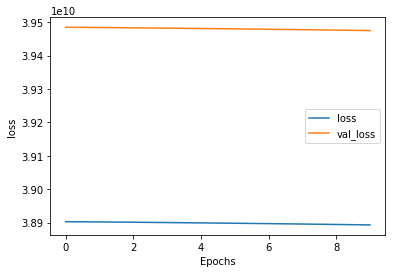

In [9]:
 plot_acc(history,'loss')